In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from scipy.stats import linregress, t

In [2]:
df_main = pd.read_hdf('../../data/processed/solicitacoes156.h5', key='data', format="table")
df_pluvi = pd.read_hdf('../../data/processed/pluviometrico.h5', key='data', format="table")

In [3]:
dummies = pd.get_dummies(df_main['SERVICO_DESCRICAO'])
columns = dummies.columns

In [4]:
df_main.drop('SERVICO_DESCRICAO',axis=1,inplace=True)

In [5]:
df_main = pd.concat([df_main,dummies],axis=1)
df_group = df_main.groupby("DATA_DEMANDA")[columns].sum()

In [6]:
df_merged = df_group.join(df_pluvi.set_index("DATA"),on="DATA_DEMANDA")

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
columns_new = df_merged.columns

In [9]:
columns_x = [x.replace(" ","_").replace(".","").replace(",","_").replace("\\","_").replace("-","_").replace("/","_") for x in columns_new]
df_merged.columns = columns_x
columns_x.remove("INDICE")

In [10]:
columns_str = 'INDICE ~ ACAO_EDUC_E_INFORMATIVA + ACENDER_CIRCUITO + ANALISE_DE_PROJETO + APAGAR_CIRCUITO + APAGAR_LAMPADA + AVAL_INST_DE_CESTAS_DE_LIXO + AVALIACAO_E_PARECER_TECNICO + CAPINACAO_DE_PRACAS_AREAS_VERD + CAPINACAO_EM_LOGRADOUROS + CAPINACAO_EM_VIA_NAO_PAVIMENTADA + CAPINACAO_EM_VIA_PAVIMENTADA + COBRANCAS_E_TAXAS_IRREGULARES + COLETA_COMPUTADORES + COLETA_HOSPITALAR_IRREGULAR + COLETA_IRREGULAR_DE_LIXO + COMPOSICAO_DE_PRECOS_E_ORCAMEN + CONECTA_RECIFE + CONSERTO_DE_CALCADAS_E_MUROS + CONTROLE_TECNOLOGICO_DO_ASFALTO + CORTE_DE_RAIZES_DE_ARVORES + DANO_CAUSADO_COLETA_LIXO + DENUNCIAS_EMLURB + DESTOCA_DE_ARVORE + DOACAO_DE_COLETA_SELETIVA + ELABORACAO_DE_PROJETOS + ERRADICACAO_DE_ARVORES + ESTRUTURA_PARA_EVENTOS + ESTUDO_GEOTECNICO + EXUMACAO + FURTO_EM_TUMULOS + IDENTIFPROPIETARIO_TERRENO + IMP_COLETA_SELETIVA + IMPLANTACAO_DE_LUMINARIAS + IMPLANTACAO_DE_PEV + IMPLANTACAO_DE_POSTE + IMPLANTACAO_DE_VAO_DE_REDE + IMPLANTACAO_DE_VARRICAO + IMPLANTACAO_LAMPADA_LED + INFRA_ESTRUTURA_PARA_EVENTOS + INSP_E_LEVANT_IP___CONVENCI + INSP_E_LEVANT_IP___ESPECIAL + INST_PLACA_PROIBITIVA + INST_PROV_ + INSTPROV_ILUMINACAO_PROJETORES + INSTPROVDE_TABLADOS_E_PALANQUES + INSTALACAO_DE_CONTENEDORES_DE_LIXO + INSTALACAO_DE_PAPELEIRAS + INSTALACAO_PROVISORIA_DE_PONTO_DE_AC + INSTALACAO_PROVISORIA_DE_QUADRO + LEVANTAMENTO_TOPOGRAFICO + LIMP_DE_GALERIAS_VALETAS_SARJETAS + LIMPEZA_DE_CANAL + LIMPEZA_DE_CANALETAS + LIMPEZA_DE_COQUEIROS_PALMEIRAS + LIMPEZA_DE_ESCADARIAS + LIMPEZA_DE_LUMINARIA + LIMPEZA_DE_PRACAS + LIMPEZA_DE_PROPRIOS_MUNICIPAIS + LIMPEZA_DE_RUAS___EVENTOS + MANUT_EM_CAMPOS_QUADRAS_POLIESPORTIVAS + MANUT_EM_LAMPADA_APAGADA + MANUT_RECUP_EM_MONUMENTOS + MANUT_RELUZ + MANUTENCAO_EM_LAMPADA_APAGADA + MANUTENCAO_EM_PEV + MUDANCA_DE_PONTO_DE_CONFINAMENTO_DE_LIXO + OBRAS_DRENAGE_RECUP_PROPRIOS + OPER_TAPA_BURACO_EM_ASFALTO + PALESTRA_COLETA_SELETIVA + PANFLETAGEN_IRREGULAR_EM_VIAS_PUBLICAS + PASSARELA_DE_PEDESTRES + PINTURA_DE_MEIO_FIO + PINTURA_EM_PONTES_E_CAIS + PLANTIO_DE_ARVORES_OU_ARBUSTO + PODA_DE_ARVORES + PONTO_CRITICO_CATADOR + POSICIONAR_LUMINARIA + PROJETO_DE_ILUMINACAO + PROJETO_DE_PAVIMENTACAO_E_DRENAGEM + PROJETO_HIDROSSANITARIO + QUEDA_DE_ARVORE + REBAIXAMENTO_COPAS_DE_ARVORES + RECAPEAMENTO_ASFALTICO + RECLAMACAO_CONTENEDOR + RECLAMACOES_DIVERSAS_NECROPOLES + RECOLOCACAO_DE_MEIO_FIO + RECUP_DE_ABATIMENTO_GALERIA + RECUP_DE_BRINQUEDOS_EM_PRACAS + RECUP_DE_CANALETA_DE_ESCADARIA + RECUP_DE_ESCADARIA + RECUP_DE_PAV_PARALELEPIPEDO + RECUP_DE_PONTES_E_PONTILHOES + RECUP_EM_PAV_DE_CONCRETO + RECUPCALCADA_POR_ERRADICAO + RECUPDA_VEGETACAO_DE_PRACAS + RECUPDE_CALCADA_PUBLICA + RECUPDE_CANALETAS_DE_DRENAGEM + RECUPE_MANUT_DE_PRACA + RECUPEM_MUROS_DE_ARRIMO + RECUPERACAO_DE_PAVIMENTO_PARALELEPIPEDO + REG_COLETA_SELETIVA + REG_DE_VARRICAO_OU_ESVAZIAR_PAPELEIRA + REGULARIZAR_COLETA_DOMICILIAR + REMOCAO_DE_ANIMAIS_MORTOS_DE_GRANDE_PORTE + REMOCAO_DE_ANIMAIS_MORTOS_PEQUENOS + REMOCAO_DE_AREIA_OU_BARRO_DE_ENXURRADA + REMOCAO_DE_ENTULHOS + REMOCAO_DE_METRALHA_OU_BARRO + REMOCAO_DE_PODA_DO_CIDADAO + REMOCAO_DE_PONTO_CRITICO + REMOCAO_DE_UTILITARIOS_DOMESTICOS_GELADEIRA_SOFA_ETC + REMOCAO_MECANIZADA + REPOSTAMPA_POCO__GALER_E_PRE_MOLDADOS + REPOSICAO_DE_LUMINARIA + REPOSICAO_DESL_E_RET_DE_POSTE + REPOSICAO_VAO_DE_REDE + RETIRADA_DE_MATERIAIS___SERVICOS + ROUBO_OU_SEGURANCA_EM_CEMITERIO + SEPULTEM_COVA_ADULTO + SEPULTEM_COVA_INFANTIL + SEPULTEM_GAVETA_ADULTO + SEPULTEM_JASIDUO + TAPA_BURACO_ASFALTO_ + TAPA_BURACO_PARALELO_ + TERRAPLANAGEM_DE_RUAS + TRATAMENTO_FITOSSANITARIO + TUMULO_DE_FAMILIA + VELORIO_POPULAR + VELORIO_PRINCIPAL + VISTORIA_DE_ARVORES + VISTORIA_INTERVENÇÃO_INDEVIDA_EM_VIAS_PÚBLICAS' 

In [11]:
model = smf.ols(columns_str,data=df_merged)

In [20]:
result = model.fit()
reg_lin = pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value']).sort_values("p-value")

In [141]:
reg_lin.to_csv("h5_1.csv",header=True, sep=',')

In [29]:
reg_lin[0:10]

,coef,SE,t,p-value
Intercept,51.944434,4.453254,11.664378,1.305336e-30
QUEDA_DE_ARVORE,4.849650,0.558511,8.683185,7.028374e-18
ERRADICACAO_DE_ARVORES,5.282286,0.753858,7.007000,3.160225e-12
LIMP_DE_GALERIAS_VALETAS_SARJETAS,1.738952,0.315113,5.518506,3.790688e-08
LIMPEZA_DE_CANALETAS,4.686608,0.910440,5.147630,2.854643e-07
MANUT_EM_LAMPADA_APAGADA,-0.570114,0.131585,-4.332674,1.534460e-05
VISTORIA_DE_ARVORES,1.419977,0.412371,3.443446,5.843154e-04
MANUTENCAO_EM_LAMPADA_APAGADA,-0.299367,0.102051,-2.933500,3.383780e-03
TUMULO_DE_FAMILIA,123.469288,43.334084,2.849242,4.420154e-03
RECUP_DE_PAV_PARALELEPIPEDO,5.597280,1.983883,2.821375,4.821621e-03


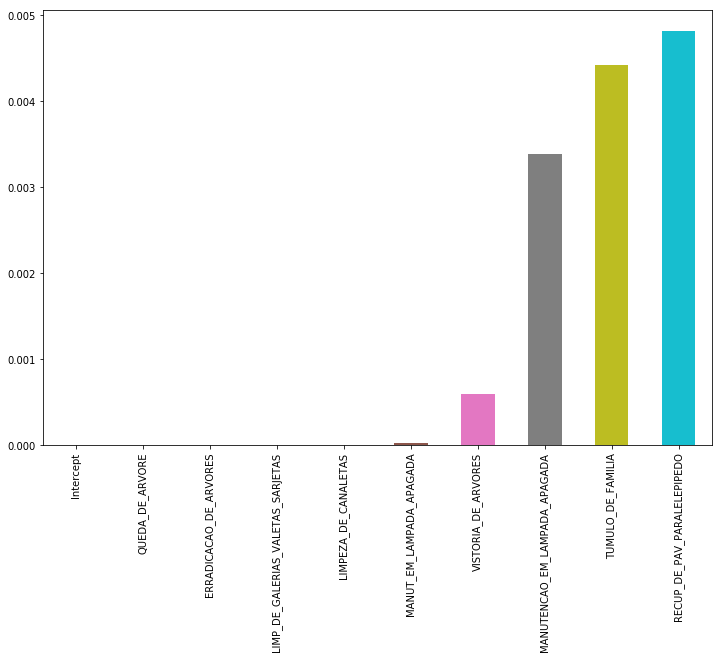

In [28]:
reg_lin[0:10]['p-value'].plot(kind="bar",figsize=(12,8))

#### Podemos notar que entre os top 10 menores valores de p-value, temos Queda de arvores, Erradicação de arvores, Limpeza de galerias, Limpeza de canaletas, Manutenção em lampada apagada e Vistoria de arvores, possuem um p-value inferior a 0.001. Isso nos fornece fortes evidências contra hipotese nula, isso mostra qu existe sim uma relação linear entre essas variaveis a quantidade de chuva.